In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**The dataset used in this notebook can be found on the following link**

https://www.kaggle.com/datasets/gucci1337/weather-of-albania-last-three-years

In [85]:
elbasan2021=pd.read_csv('/kaggle/input/weather-of-albania-last-three-years/data_weather/elbasan/elbasan2021.csv')

In [5]:
elbasan2021.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,363.000000,363.000000,363.000000,363.000000,0.0,363.000000,363.000000,0.0,363.000000,0.0
mean,16.808815,11.875758,22.817631,3.830854,NaN,173.548209,5.772727,NaN,1015.372727,NaN
std,7.651113,7.326201,8.430825,8.499827,NaN,128.741850,2.510123,NaN,5.827042,NaN
min,-1.000000,-7.400000,2.000000,0.000000,NaN,0.000000,1.900000,NaN,999.100000,NaN
25%,10.900000,7.000000,16.100000,0.000000,NaN,52.000000,4.200000,NaN,1011.850000,NaN
50%,16.000000,11.200000,22.600000,0.000000,NaN,135.000000,5.200000,NaN,1014.800000,NaN
75%,22.600000,17.600000,29.300000,2.100000,NaN,327.000000,6.500000,NaN,1018.700000,NaN
max,32.700000,27.000000,42.000000,45.800000,NaN,359.000000,16.300000,NaN,1032.500000,NaN


This table clearly shows that in 2021 in Elbasan, ALbania, average temperature remained at 16 degrees

During the year, minimum temperature was recorded at -7.4 degrees while maximum temperature stood at 42 degrees

In addition, average rainfall was 3.83mm during the year

There was no snow at all

In [11]:
elbasan2021.isnull().sum()

date      0
tavg      2
tmin      2
tmax      2
prcp      2
snow    365
wdir      2
wspd      2
wpgt    365
pres      2
tsun    365
dtype: int64

2 Data points are missing. Lets drop them. Snow and Tsun columns add no value. Lets drop them as well. 

In [12]:
elbasan2021=elbasan2021.drop(columns=['snow', 'wpgt', 'tsun'])

elbasan2021=elbasan2021.dropna()

In [13]:
elbasan2021

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres
1,2021-01-02,11.2,6.0,18.4,0.0,91.0,9.8,1016.3
2,2021-01-03,12.3,7.4,18.2,2.1,130.0,8.0,1014.5
3,2021-01-04,9.2,7.5,11.4,14.9,132.0,5.8,1010.9
4,2021-01-05,9.8,7.0,15.2,2.2,135.0,8.6,1014.8
5,2021-01-06,10.6,9.9,12.0,13.3,141.0,13.9,1016.7
...,...,...,...,...,...,...,...,...
360,2021-12-27,11.6,9.9,13.4,41.5,123.0,10.0,1011.1
361,2021-12-28,11.6,8.1,16.2,1.7,31.0,3.4,1009.0
362,2021-12-29,9.9,5.0,11.8,3.0,81.0,3.6,1008.2
363,2021-12-30,8.0,3.0,16.6,0.0,34.0,5.3,1014.1


There is a need to separate date into day, year and months

In [15]:
elbasan2021.dtypes

date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
wdir    float64
wspd    float64
pres    float64
dtype: object

In [16]:
elbasan2021['date'] = pd.to_datetime(elbasan2021['date'])
elbasan2021['year'] = elbasan2021['date'].dt.year
elbasan2021['month'] = elbasan2021['date'].dt.month
elbasan2021['day'] = elbasan2021['date'].dt.day
elbasan2021

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,day
1,2021-01-02,11.2,6.0,18.4,0.0,91.0,9.8,1016.3,2021,1,2
2,2021-01-03,12.3,7.4,18.2,2.1,130.0,8.0,1014.5,2021,1,3
3,2021-01-04,9.2,7.5,11.4,14.9,132.0,5.8,1010.9,2021,1,4
4,2021-01-05,9.8,7.0,15.2,2.2,135.0,8.6,1014.8,2021,1,5
5,2021-01-06,10.6,9.9,12.0,13.3,141.0,13.9,1016.7,2021,1,6
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,11.6,9.9,13.4,41.5,123.0,10.0,1011.1,2021,12,27
361,2021-12-28,11.6,8.1,16.2,1.7,31.0,3.4,1009.0,2021,12,28
362,2021-12-29,9.9,5.0,11.8,3.0,81.0,3.6,1008.2,2021,12,29
363,2021-12-30,8.0,3.0,16.6,0.0,34.0,5.3,1014.1,2021,12,30


In [24]:
elbasan2021Pivot = elbasan2021.pivot_table('tavg',index='month', columns='day')
elbasan2021Pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,11.2,12.3,9.2,9.8,10.6,10.8,13.4,11.8,13.9,...,11.7,11.0,9.8,10.1,6.9,2.5,2.7,9.2,10.8,11.8
2,10.7,11.4,11.5,11.7,12.3,13.0,14.6,13.4,11.3,13.3,...,10.9,10.8,12.3,13.1,14.1,12.9,12.2,NaN,NaN,NaN
3,10.6,10.0,11.3,11.1,11.1,11.4,9.1,9.2,12.3,10.2,...,6.7,7.0,6.3,6.9,7.8,10.4,NaN,12.8,12.5,13.4
4,13.9,15.2,15.6,11.6,10.3,11.6,10.2,8.4,8.6,10.3,...,11.9,13.7,14.2,14.6,15.8,16.4,17.4,19.3,21.0,NaN
5,21.6,21.4,18.2,17.2,18.3,18.4,18.4,19.2,19.2,20.2,...,18.4,20.3,23.5,23.6,22.0,20.3,19.5,20.1,19.2,17.6
6,17.2,18.1,19.3,20.6,21.7,22.8,21.5,21.2,22.4,22.4,...,29.3,30.0,31.7,31.3,29.9,27.7,28.2,29.3,29.6,NaN
7,27.5,25.7,24.7,25.8,26.0,27.3,28.8,30.1,30.4,28.7,...,25.5,25.4,26.3,27.6,29.4,30.3,32.0,32.7,31.6,30.1
8,32.5,31.3,30.2,31.1,30.3,26.5,27.0,28.9,30.4,30.4,...,26.6,27.0,27.6,25.9,22.8,23.9,25.0,22.4,21.9,21.9
9,22.5,21.5,21.9,22.6,23.1,23.4,22.7,21.8,21.7,21.8,...,19.8,16.8,18.2,19.4,21.6,22.9,23.0,21.8,20.4,NaN


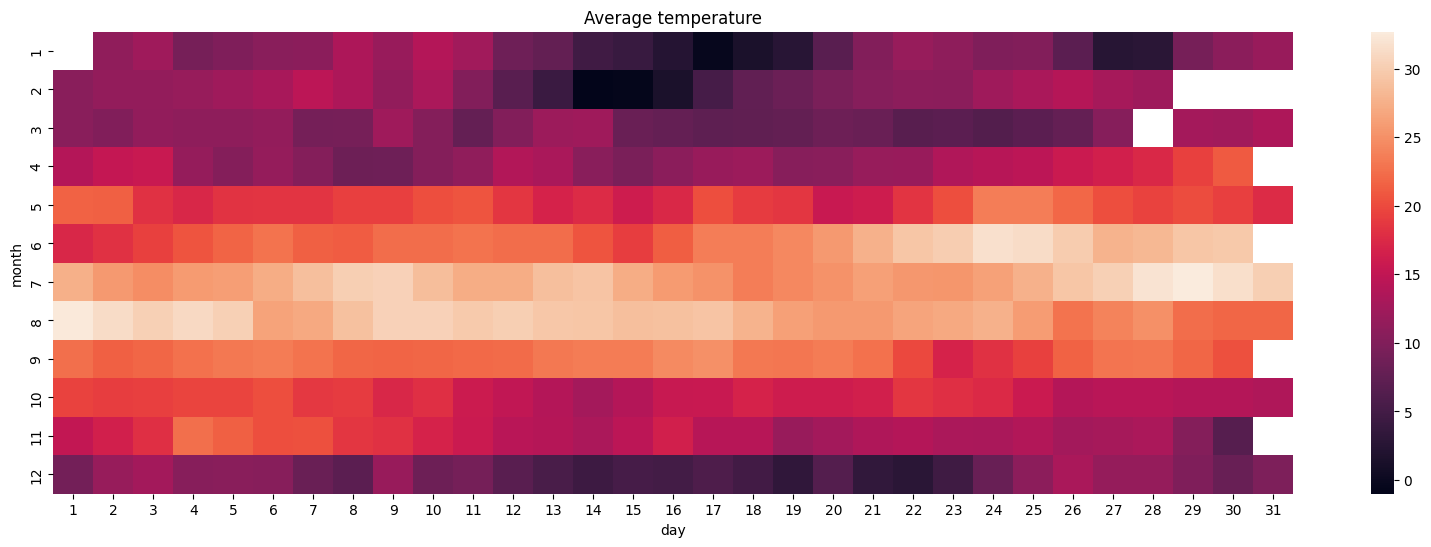

In [30]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(elbasan2021Pivot);

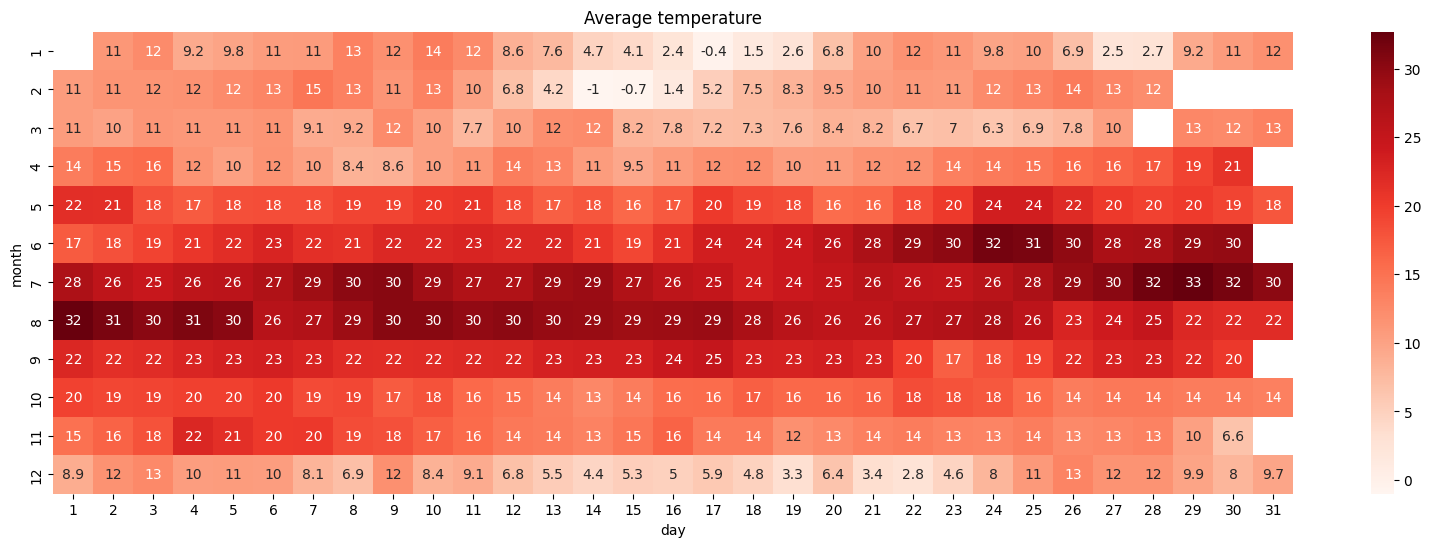

In [35]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(elbasan2021Pivot,  annot=True, cmap='Reds');

In [42]:
elbasan2021PivotPres = elbasan2021.pivot_table('prcp',index='month', columns='day')
elbasan2021PivotPres

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,0.0,2.1,14.9,2.2,13.3,37.3,42.7,9.4,16.4,...,4.3,12.7,35.8,23.9,19.3,0.0,0.0,10.3,20.6,13.9
2,15.8,2.1,0.0,0.0,0.0,0.0,0.1,11.9,24.3,7.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.5,0.2,29.1,...,13.6,0.0,0.3,0.0,0.0,0.0,NaN,0.2,0.0,0.0
4,0.0,1.0,3.7,21.9,0.0,0.4,12.9,1.3,0.0,0.0,...,4.0,12.2,0.2,0.0,0.2,0.5,0.0,0.0,0.0,NaN
5,0.7,1.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.9,1.8
6,0.0,0.0,0.0,0.0,0.0,0.0,11.5,10.9,0.5,3.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
7,0.0,0.0,3.0,0.0,2.1,0.0,0.0,0.0,0.0,3.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.4,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.8,45.8,1.0,0.8,11.9,0.0,0.0
9,0.0,0.0,0.0,0.0,0.8,0.3,0.0,0.0,0.0,1.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.9,7.6,NaN


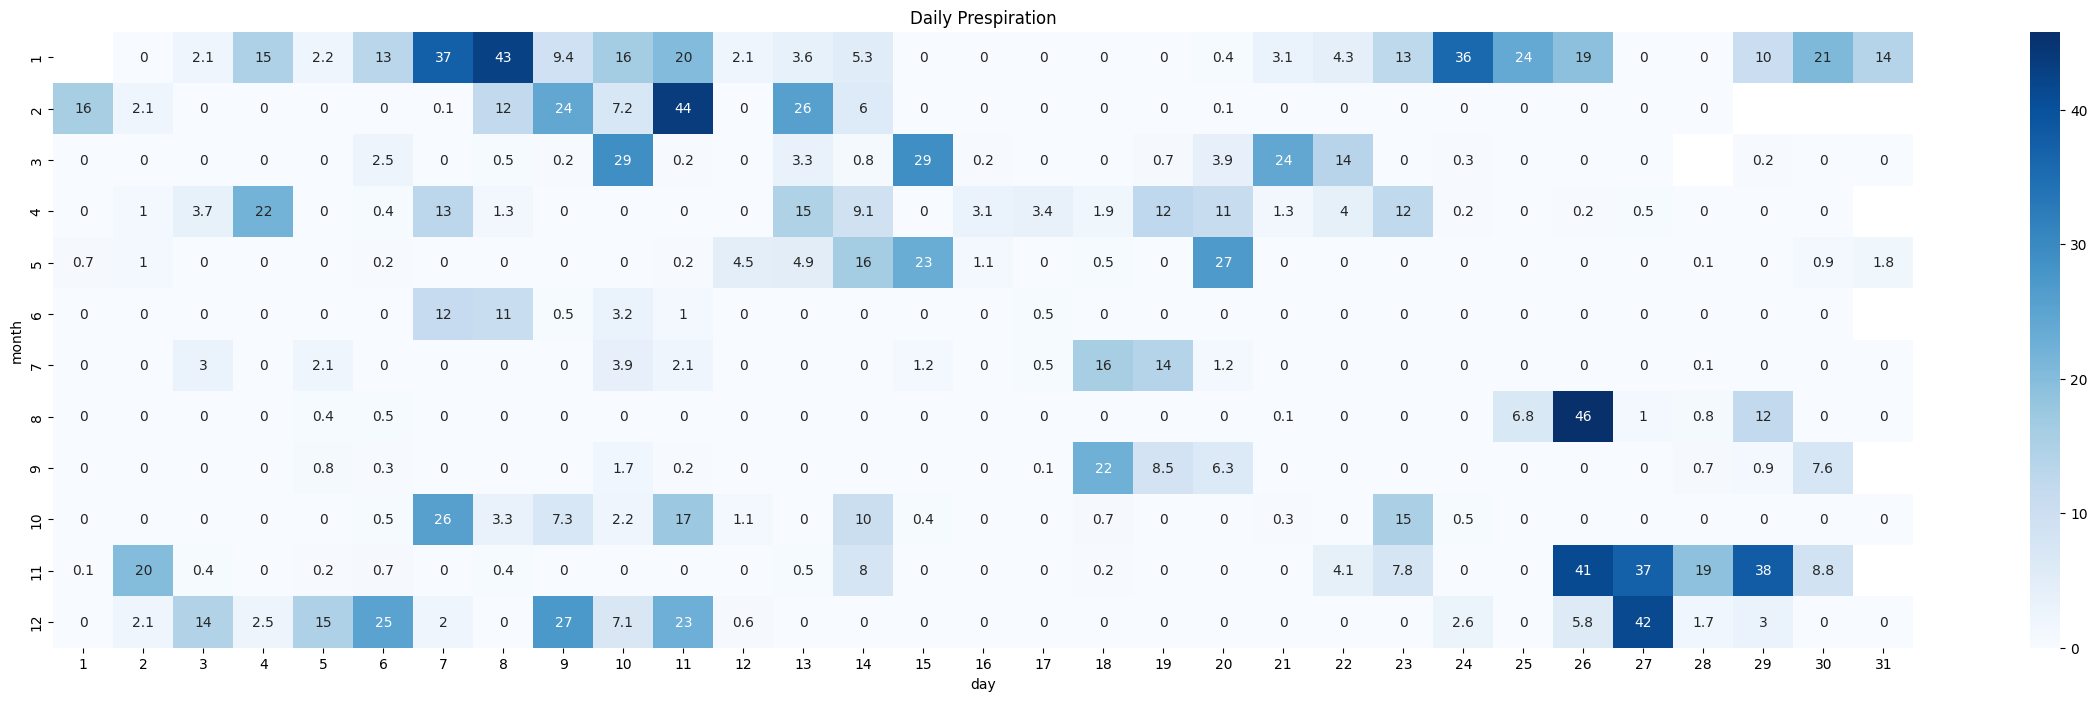

In [44]:
plt.figure(figsize=(30, 8)) 
plt.title("Daily Prespiration")
sns.heatmap(elbasan2021PivotPres, annot=True, cmap='Blues');

In [51]:
monthly_prespiration = elbasan2021.groupby(pd.Grouper(key='date', freq='ME'))['prcp'].sum().reset_index()
monthly_prespiration['month'] = monthly_prespiration['date'].dt.strftime('%Y-%m')

print(monthly_prespiration)


         date   prcp    month
0  2021-01-31  313.9  2021-01
1  2021-02-28  136.8  2021-02
2  2021-03-31  108.8  2021-03
3  2021-04-30  115.3  2021-04
4  2021-05-31   82.3  2021-05
5  2021-06-30   27.6  2021-06
6  2021-07-31   43.8  2021-07
7  2021-08-31   67.3  2021-08
8  2021-09-30   49.6  2021-09
9  2021-10-31   85.0  2021-10
10 2021-11-30  186.7  2021-11
11 2021-12-31  173.5  2021-12


<BarContainer object of 12 artists>

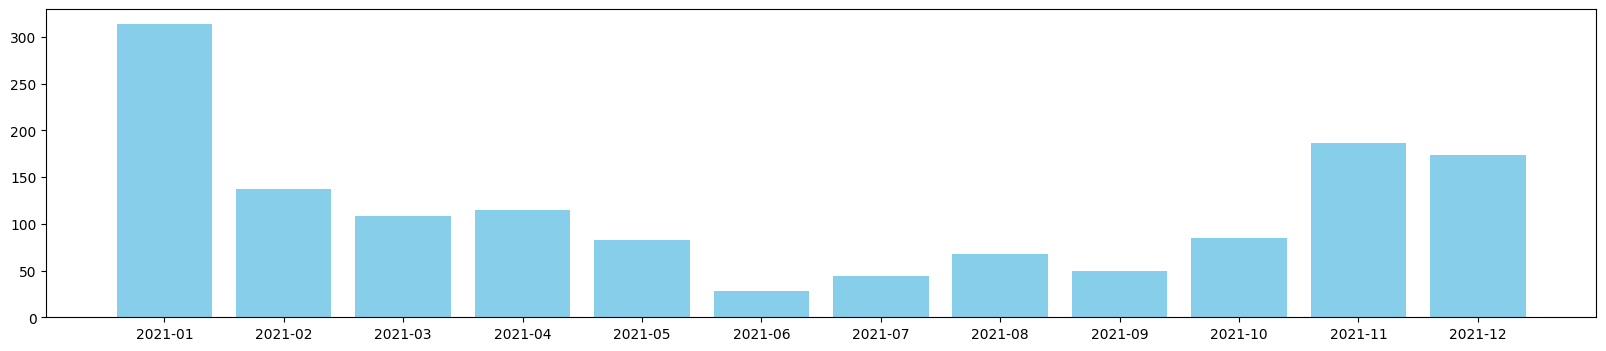

In [58]:
plt.figure(figsize=(20,4)) 
df = pd.DataFrame(monthly_prespiration)
plt.bar(df['month'], df['prcp'], color='skyblue')

# Elbasan Data Analysis in 2022

In [61]:
elbasan2022=pd.read_csv('/kaggle/input/weather-of-albania-last-three-years/data_weather/elbasan/elbasan2022.csv')

In [62]:
elbasan2022.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,363.000000,363.000000,363.000000,363.000000,0.0,363.000000,363.000000,0.0,363.000000,0.0
mean,17.124242,11.926997,23.524518,3.957025,NaN,158.542700,5.417355,NaN,1016.066116,NaN
std,7.525949,7.386286,7.966898,10.476658,NaN,132.555129,2.171336,NaN,6.465696,NaN
min,-0.300000,-5.200000,4.200000,0.000000,NaN,0.000000,2.000000,NaN,997.600000,NaN
25%,11.000000,6.450000,16.700000,0.000000,NaN,39.500000,4.100000,NaN,1011.900000,NaN
50%,17.000000,12.000000,23.800000,0.000000,NaN,112.000000,5.000000,NaN,1015.300000,NaN
75%,23.900000,18.150000,30.000000,1.350000,NaN,323.000000,6.100000,NaN,1020.200000,NaN
max,30.500000,24.500000,38.400000,85.600000,NaN,359.000000,15.000000,NaN,1035.000000,NaN


In [63]:
elbasan2022.isnull().sum()

date      0
tavg      2
tmin      2
tmax      2
prcp      2
snow    365
wdir      2
wspd      2
wpgt    365
pres      2
tsun    365
dtype: int64

In [64]:
elbasan2022=elbasan2022.drop(columns=['snow', 'wpgt', 'tsun'])

In [65]:
elbasan2022=elbasan2022.dropna()

In [66]:
elbasan2022['date'] = pd.to_datetime(elbasan2022['date'])
elbasan2022['year'] = elbasan2022['date'].dt.year
elbasan2022['month'] = elbasan2022['date'].dt.month
elbasan2022['day'] = elbasan2022['date'].dt.day
elbasan2022

,date,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,day
0,2022-01-01,10.8,5.0,16.6,0.0,34.0,2.6,1022.3,2022,1,1
1,2022-01-02,10.5,5.2,20.0,0.0,54.0,3.4,1023.8,2022,1,2
2,2022-01-03,11.1,5.6,16.2,0.9,112.0,4.1,1021.1,2022,1,3
3,2022-01-04,10.8,7.1,15.8,1.1,111.0,5.1,1017.7,2022,1,4
4,2022-01-05,12.1,7.2,19.0,0.0,103.0,5.2,1011.4,2022,1,5
...,...,...,...,...,...,...,...,...,...,...,...
360,2022-12-27,12.0,8.6,18.2,0.0,106.0,3.8,1026.5,2022,12,27
361,2022-12-28,11.7,8.2,17.6,0.0,59.0,3.1,1025.5,2022,12,28
362,2022-12-29,11.1,7.8,16.4,0.0,82.0,2.9,1026.3,2022,12,29
363,2022-12-30,12.1,8.7,18.0,0.0,90.0,4.7,1026.4,2022,12,30


In [67]:
elbasan2022Pivot = elbasan2022.pivot_table('tavg',index='month', columns='day')
elbasan2022Pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,10.8,10.5,11.1,10.8,12.1,13.0,11.1,9.8,8.5,7.4,...,1.1,0.8,-0.1,-0.3,2.4,3.8,5.2,4.6,4.5,5.9
2,7.1,5.8,5.0,5.7,9.1,10.9,9.6,5.1,6.0,9.3,...,10.3,9.2,8.0,8.9,10.5,8.2,7.0,NaN,NaN,NaN
3,6.1,5.5,5.5,7.6,7.2,7.3,6.7,5.8,5.5,4.7,...,8.5,11.3,11.7,12.3,13.9,NaN,11.9,13.7,13.8,15.4
4,14.1,10.9,8.8,9.6,11.8,13.4,12.4,14.2,16.6,11.4,...,19.2,16.2,17.3,17.0,16.9,17.1,17.2,18.5,18.6,NaN
5,17.0,14.7,14.6,15.5,16.6,17.0,18.9,17.8,18.7,19.2,...,21.8,22.5,24.3,25.4,NaN,26.1,24.8,20.8,21.8,23.9
6,24.3,25.5,27.0,27.4,27.6,28.0,26.1,22.5,20.5,20.2,...,26.6,27.5,27.2,28.0,26.9,27.9,29.6,29.1,28.6,NaN
7,29.4,30.3,29.9,30.0,30.1,28.6,27.4,22.2,22.9,22.8,...,29.1,30.2,30.0,29.8,29.5,29.7,29.1,29.0,28.2,27.2
8,27.2,27.4,27.8,28.5,28.7,28.8,30.5,29.5,28.5,27.8,...,23.9,24.3,24.3,24.8,25.9,26.0,26.2,24.8,24.7,25.2
9,24.9,22.6,23.2,24.5,24.4,23.8,24.1,25.2,24.3,24.8,...,15.7,15.9,16.9,18.7,19.7,19.3,19.5,19.5,21.8,NaN


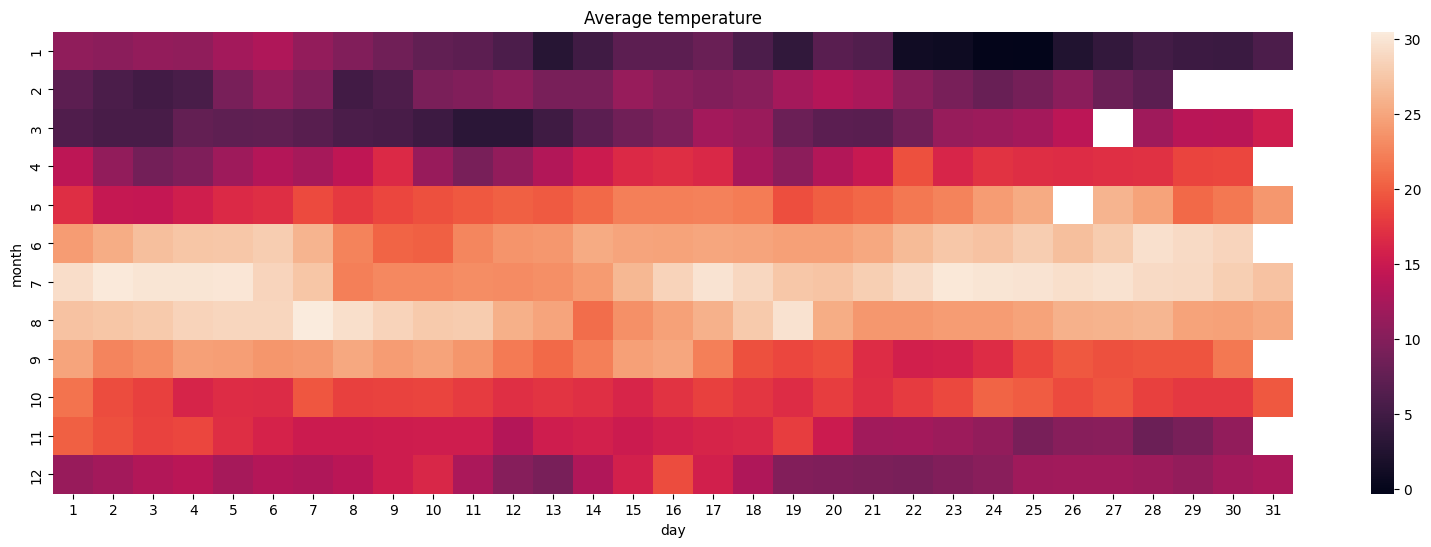

In [68]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(elbasan2022Pivot);

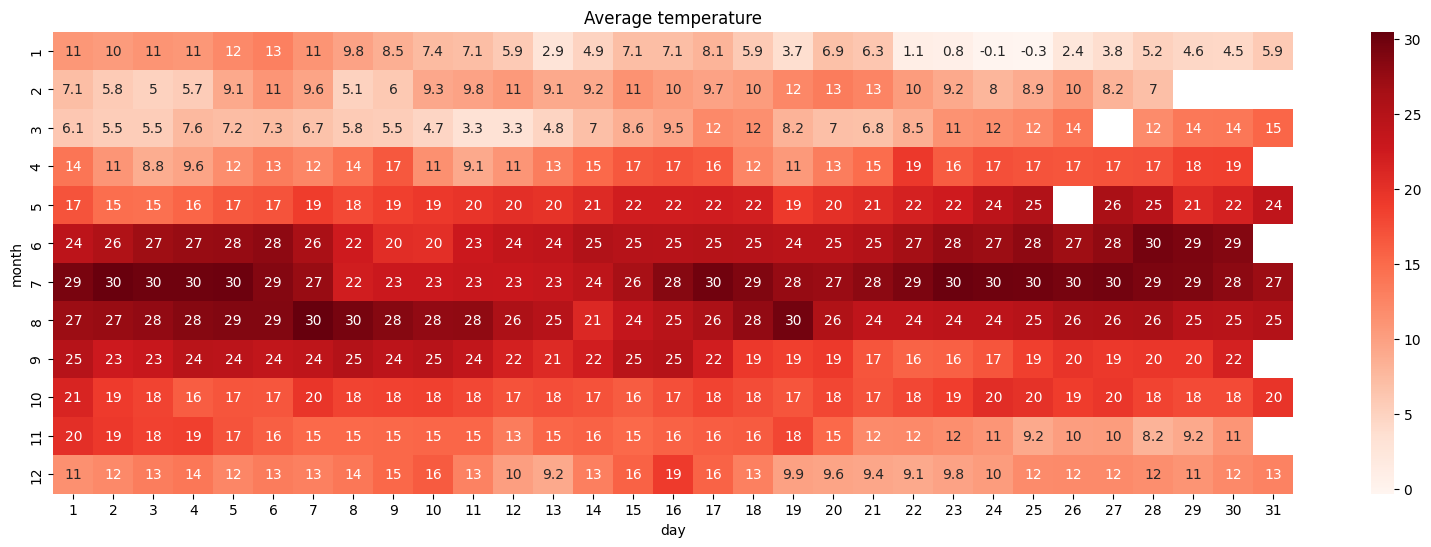

In [69]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(elbasan2022Pivot,  annot=True, cmap='Reds');

In [71]:

monthly_prespiration = elbasan2022.groupby(pd.Grouper(key='date', freq='ME'))['prcp'].sum().reset_index()
monthly_prespiration['month'] = monthly_prespiration['date'].dt.strftime('%Y-%m')

print(monthly_prespiration)

         date   prcp    month
0  2022-01-31   70.5  2022-01
1  2022-02-28  123.8  2022-02
2  2022-03-31   72.5  2022-03
3  2022-04-30  223.3  2022-04
4  2022-05-31   33.6  2022-05
5  2022-06-30   70.2  2022-06
6  2022-07-31   23.7  2022-07
7  2022-08-31   27.0  2022-08
8  2022-09-30  239.3  2022-09
9  2022-10-31   83.0  2022-10
10 2022-11-30  233.3  2022-11
11 2022-12-31  236.2  2022-12


<BarContainer object of 12 artists>

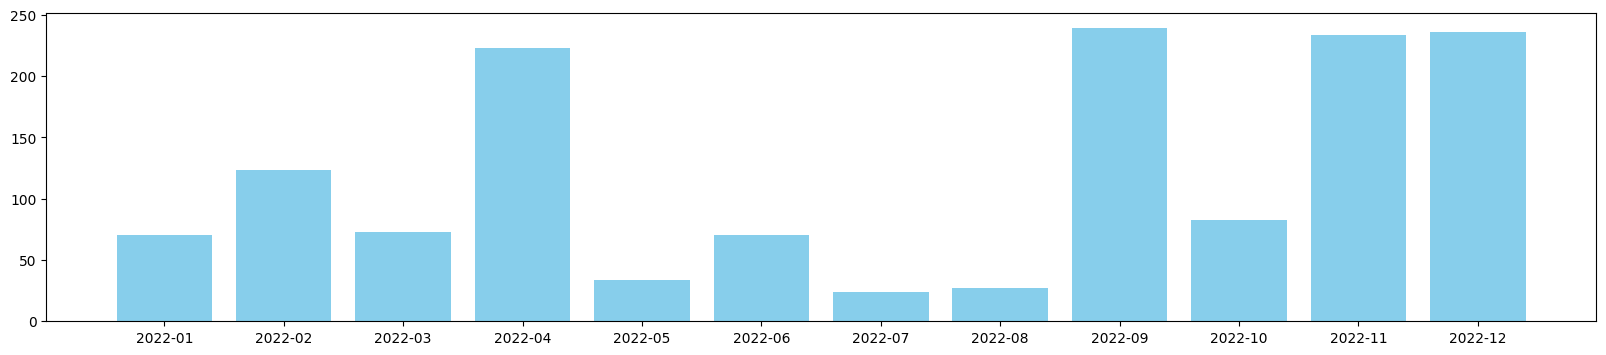

In [72]:
plt.figure(figsize=(20,4)) 
df = pd.DataFrame(monthly_prespiration)
plt.bar(df['month'], df['prcp'], color='skyblue')

# Data analysis of Vlore 2021

In [73]:
Vlore2021=pd.read_csv('/kaggle/input/weather-of-albania-last-three-years/data_weather/vlore/vlore2021.csv')

In [74]:
Vlore2021.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,363.000000,363.000000,363.000000,363.000000,0.0,363.000000,363.000000,0.0,363.000000,0.0
mean,16.879614,12.270248,22.358127,3.035262,NaN,116.922865,8.266116,NaN,1015.234435,NaN
std,7.039535,6.602711,7.651249,7.578490,NaN,90.416804,2.977574,NaN,5.785775,NaN
min,0.300000,-3.400000,2.700000,0.000000,NaN,1.000000,3.800000,NaN,999.700000,NaN
25%,11.400000,7.100000,16.600000,0.000000,NaN,44.000000,6.200000,NaN,1011.600000,NaN
50%,16.100000,12.000000,21.600000,0.000000,NaN,93.000000,7.500000,NaN,1014.700000,NaN
75%,22.350000,17.550000,28.250000,1.400000,NaN,164.000000,9.400000,NaN,1018.600000,NaN
max,30.900000,25.900000,39.400000,48.000000,NaN,359.000000,21.200000,NaN,1032.500000,NaN


In [75]:
Vlore2021.isnull().sum()

date      0
tavg      2
tmin      2
tmax      2
prcp      2
snow    365
wdir      2
wspd      2
wpgt    365
pres      2
tsun    365
dtype: int64

In [76]:
Vlore2021=Vlore2021.drop(columns=['snow', 'wpgt', 'tsun'])

Vlore2021=Vlore2021.dropna()

In [77]:

Vlore2021['date'] = pd.to_datetime(Vlore2021['date'])
Vlore2021['year'] = Vlore2021['date'].dt.year
Vlore2021['month'] = Vlore2021['date'].dt.month
Vlore2021['day'] = Vlore2021['date'].dt.day
Vlore2021


,date,tavg,tmin,tmax,prcp,wdir,wspd,pres,year,month,day
1,2021-01-02,11.0,7.4,17.0,0.7,99.0,9.2,1015.9,2021,1,2
2,2021-01-03,11.9,7.9,16.6,2.3,143.0,9.8,1014.4,2021,1,3
3,2021-01-04,9.1,7.3,11.5,27.8,56.0,7.8,1010.9,2021,1,4
4,2021-01-05,9.6,5.5,15.3,0.4,139.0,8.2,1014.8,2021,1,5
5,2021-01-06,12.4,9.5,15.0,5.5,176.0,14.3,1016.6,2021,1,6
...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,13.1,9.0,17.0,22.2,156.0,13.7,1010.9,2021,12,27
361,2021-12-28,10.9,6.7,17.2,0.0,65.0,4.6,1008.6,2021,12,28
362,2021-12-29,10.2,5.7,15.6,4.8,110.0,4.7,1008.1,2021,12,29
363,2021-12-30,9.4,6.3,15.7,0.0,41.0,8.9,1013.5,2021,12,30


In [78]:
Vlore2021Pivot = Vlore2021.pivot_table('tavg',index='month', columns='day')
Vlore2021Pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,11.0,11.9,9.1,9.6,12.4,13.3,16.2,12.3,16.4,...,12.2,11.1,11.7,12.0,9.0,4.2,4.4,10.5,11.4,12.4
2,11.8,11.7,10.5,11.5,11.3,11.8,15.1,14.1,12.7,14.1,...,9.9,9.8,10.4,12.2,11.4,11.1,11.9,NaN,NaN,NaN
3,11.2,10.6,9.9,9.6,10.9,11.5,9.4,10.3,11.6,10.9,...,8.2,7.3,7.4,7.4,8.1,10.7,NaN,11.7,12.7,12.9
4,13.0,14.8,15.1,12.5,10.1,11.6,11.7,9.1,8.6,9.9,...,12.0,13.6,13.8,13.9,14.8,16.7,16.0,17.7,19.4,NaN
5,20.7,21.3,17.5,16.8,18.1,17.9,17.6,18.3,18.2,19.3,...,18.1,19.2,21.3,22.0,20.0,19.6,19.7,19.5,18.3,18.2
6,17.8,18.2,19.0,20.2,21.1,23.2,22.5,21.3,22.0,22.0,...,29.8,27.2,28.9,30.8,28.6,26.5,27.4,28.2,29.0,NaN
7,27.2,25.4,24.9,25.8,25.7,26.3,27.1,27.8,29.1,27.4,...,25.6,25.2,25.7,26.7,28.0,28.6,29.7,30.8,29.9,28.9
8,30.6,30.9,30.0,29.9,30.3,27.2,26.2,27.2,28.7,28.6,...,26.2,26.0,25.8,25.2,23.8,24.4,24.8,23.4,22.3,22.3
9,22.6,22.7,22.6,22.1,22.7,23.2,22.7,21.8,21.1,21.2,...,20.8,18.1,18.7,19.3,20.0,22.6,22.6,21.8,20.6,NaN


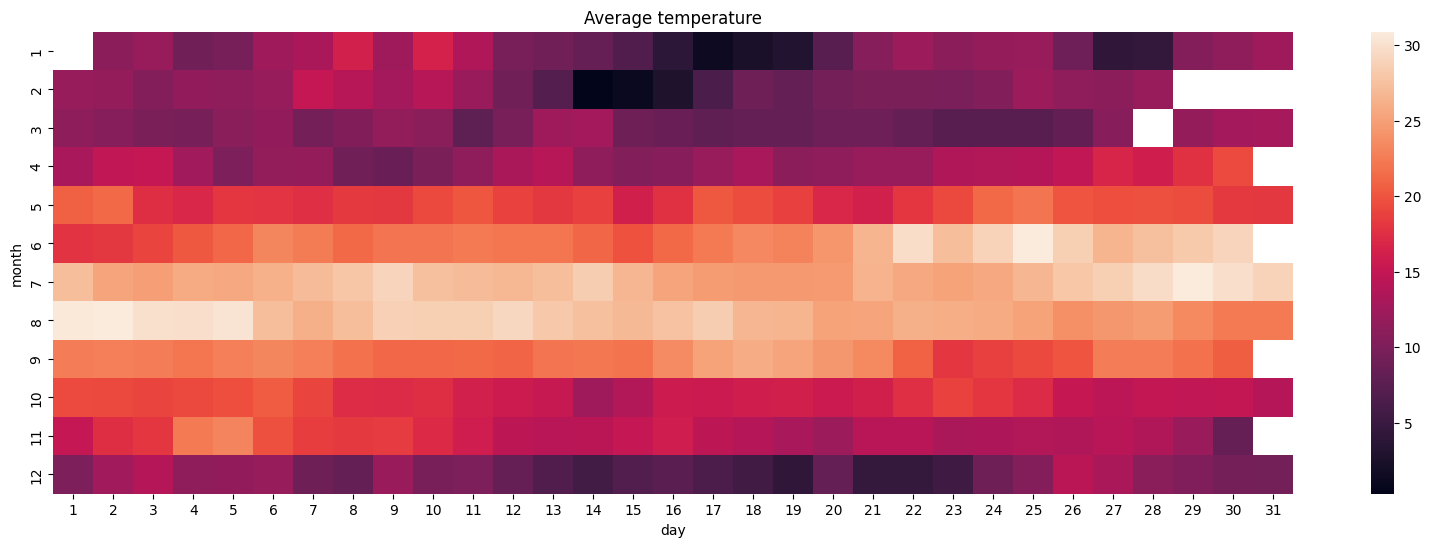

In [79]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(Vlore2021Pivot);

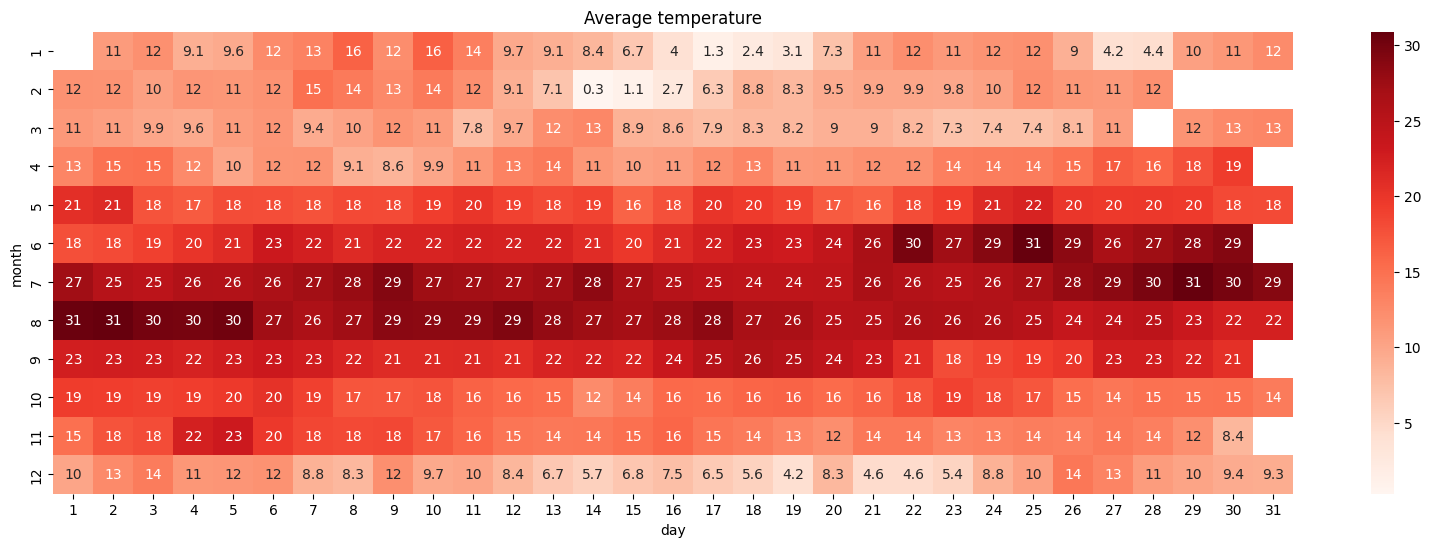

In [82]:
plt.figure(figsize=(20, 6)) 
plt.title("Average temperature")
sns.heatmap(Vlore2021Pivot,  annot=True, cmap='Reds');

In [83]:
monthly_prespiration = Vlore2021.groupby(pd.Grouper(key='date', freq='ME'))['prcp'].sum().reset_index()
monthly_prespiration['month'] = monthly_prespiration['date'].dt.strftime('%Y-%m')

print(monthly_prespiration)


         date   prcp    month
0  2021-01-31  254.3  2021-01
1  2021-02-28  111.5  2021-02
2  2021-03-31   83.1  2021-03
3  2021-04-30   74.6  2021-04
4  2021-05-31   20.2  2021-05
5  2021-06-30    4.1  2021-06
6  2021-07-31    8.8  2021-07
7  2021-08-31   37.5  2021-08
8  2021-09-30   15.7  2021-09
9  2021-10-31  130.9  2021-10
10 2021-11-30  161.7  2021-11
11 2021-12-31  199.4  2021-12


<BarContainer object of 12 artists>

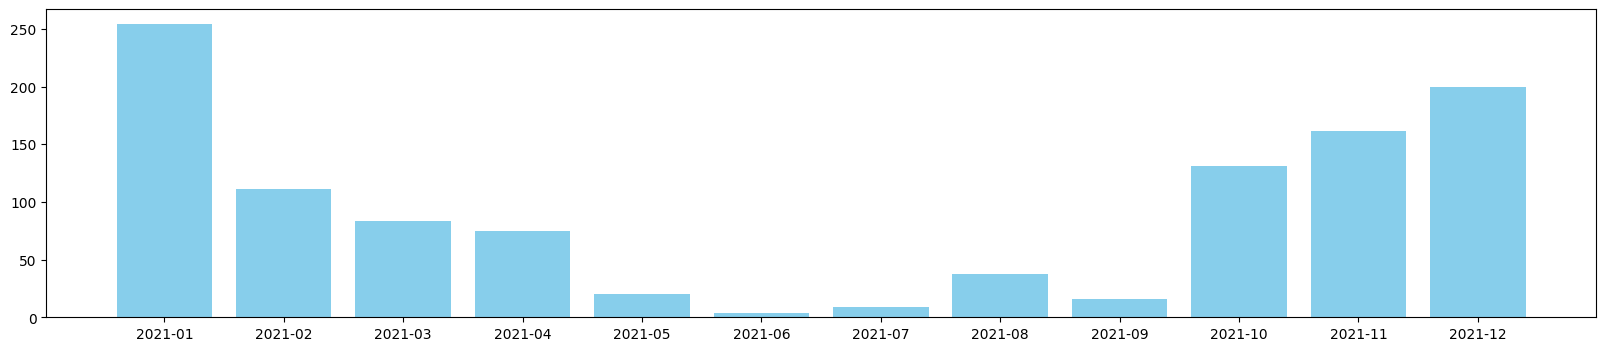

In [84]:
plt.figure(figsize=(20,4)) 
df = pd.DataFrame(monthly_prespiration)
plt.bar(df['month'], df['prcp'], color='skyblue')